In [55]:
#Import dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats


In [56]:
#import Census data and crime data
census_df = pd.read_csv("califpop_df.csv")
crime_df = pd.read_csv("county_crime_df.csv")
cali_boundaries_df = pd.read_csv("us-county-boundaries - California.csv")
housing_df = pd.read_csv("housing_df.csv")
housing_df.head()

,index,2016 Median Housing,2017 Median Housing,2018 Median Housing,2019 Median Housing,2020 Median Housing
0,Alameda County,605800.0,662100.0,722800.0,785800.0,843500.0
1,Alpine County,356100.0,360600.0,368100.0,391000.0,394300.0
2,Amador County,273900.0,288700.0,302600.0,324500.0,339400.0
3,Butte County,242200.0,255400.0,270100.0,294100.0,328400.0
4,Calaveras County,266900.0,281100.0,308800.0,333200.0,346300.0


In [57]:
#pull boundaries table and create a dataframe with only 3 of the needed columns
coordinates_df = cali_boundaries_df[['NAMELSAD','INTPTLAT','INTPTLON']]

#merge latitude and longitude of california counties with the crime table
crime_df = crime_df.merge(coordinates_df,how="left",left_on="County",right_on="NAMELSAD")
crime_df = crime_df.drop(columns=["NAMELSAD","Unnamed: 0"]).rename(columns={"INTPTLAT": "Latitude", "INTPTLON": "Longitude"})

crime_df.head()

,County,2016,2017,2018,2019,2020,Latitude,Longitude
0,Alameda County,70242.0,74223.0,69248.0,76846.0,68433.0,37.647138,-121.912488
1,Alpine County,40.0,45.0,41.0,45.0,33.0,38.621783,-119.798352
2,Amador County,765.0,769.0,721.0,795.0,745.0,38.443550,-120.653856
3,Butte County,8310.0,8375.0,7120.0,6421.0,5546.0,39.665959,-121.601919
4,Calaveras County,834.0,998.0,1057.0,983.0,924.0,38.183900,-120.561442


In [58]:
#remove commas from population data and convert string to float
census_df[['Population 2016','Population 2017',
           'Population 2018','Population 2019','Population 2020']] = census_df[['Population 2016','Population 2017',
           'Population 2018','Population 2019','Population 2020']] .replace(',', '', regex=True).astype(float)
census_df.head()

,Unnamed: 0,COUNTY,County,Population 2016,Population 2017,Population 2018,Population 2019,Population 2020
0,191,1,Alameda County,1650765.0,1659824.0,1666596.0,1668412.0,1662323.0
1,192,3,Alpine County,1053.0,1116.0,1081.0,1113.0,1119.0
2,193,5,Amador County,37443.0,38549.0,39349.0,39693.0,40083.0
3,194,7,Butte County,226222.0,228700.0,230330.0,218726.0,212744.0
4,195,9,Calaveras County,45307.0,45658.0,45747.0,46119.0,46308.0


In [59]:
#merge population table to crime table
crime_df = crime_df.merge(census_df,how="left",on="County")
crime_df.head()

,County,2016,2017,2018,2019,2020,Latitude,Longitude,Unnamed: 0,COUNTY,Population 2016,Population 2017,Population 2018,Population 2019,Population 2020
0,Alameda County,70242.0,74223.0,69248.0,76846.0,68433.0,37.647138,-121.912488,191,1,1650765.0,1659824.0,1666596.0,1668412.0,1662323.0
1,Alpine County,40.0,45.0,41.0,45.0,33.0,38.621783,-119.798352,192,3,1053.0,1116.0,1081.0,1113.0,1119.0
2,Amador County,765.0,769.0,721.0,795.0,745.0,38.443550,-120.653856,193,5,37443.0,38549.0,39349.0,39693.0,40083.0
3,Butte County,8310.0,8375.0,7120.0,6421.0,5546.0,39.665959,-121.601919,194,7,226222.0,228700.0,230330.0,218726.0,212744.0
4,Calaveras County,834.0,998.0,1057.0,983.0,924.0,38.183900,-120.561442,195,9,45307.0,45658.0,45747.0,46119.0,46308.0


In [60]:
#Determine crime per capita for each year
crime_df['2016 Crime per Capita (%)'] = crime_df['2016']/crime_df['Population 2016']*100
crime_df['2017 Crime per Capita (%)'] = crime_df['2017']/crime_df['Population 2017']*100
crime_df['2018 Crime per Capita (%)'] = crime_df['2018']/crime_df['Population 2018']*100
crime_df['2019 Crime per Capita (%)'] = crime_df['2019']/crime_df['Population 2019']*100
crime_df['2020 Crime per Capita (%)'] = crime_df['2020']/crime_df['Population 2020']*100

crime_df = crime_df.drop(columns={"Unnamed: 0","COUNTY"})
crime_df.head()

,County,2016,2017,2018,2019,2020,Latitude,Longitude,Population 2016,Population 2017,Population 2018,Population 2019,Population 2020,2016 Crime per Capita (%),2017 Crime per Capita (%),2018 Crime per Capita (%),2019 Crime per Capita (%),2020 Crime per Capita (%)
0,Alameda County,70242.0,74223.0,69248.0,76846.0,68433.0,37.647138,-121.912488,1650765.0,1659824.0,1666596.0,1668412.0,1662323.0,4.255118,4.471739,4.155056,4.605937,4.116709
1,Alpine County,40.0,45.0,41.0,45.0,33.0,38.621783,-119.798352,1053.0,1116.0,1081.0,1113.0,1119.0,3.798670,4.032258,3.792784,4.043127,2.949062
2,Amador County,765.0,769.0,721.0,795.0,745.0,38.443550,-120.653856,37443.0,38549.0,39349.0,39693.0,40083.0,2.043106,1.994864,1.832321,2.002872,1.858643
3,Butte County,8310.0,8375.0,7120.0,6421.0,5546.0,39.665959,-121.601919,226222.0,228700.0,230330.0,218726.0,212744.0,3.673383,3.662003,3.091217,2.935636,2.606889
4,Calaveras County,834.0,998.0,1057.0,983.0,924.0,38.183900,-120.561442,45307.0,45658.0,45747.0,46119.0,46308.0,1.840775,2.185816,2.310534,2.131443,1.995336


In [61]:
#merge housing data to crime table
crime_df = crime_df.merge(housing_df,how="left",left_on="County",right_on="index").drop(columns={'index'})
crime_df.head()

,County,2016,2017,2018,2019,2020,Latitude,Longitude,Population 2016,Population 2017,...,2016 Crime per Capita (%),2017 Crime per Capita (%),2018 Crime per Capita (%),2019 Crime per Capita (%),2020 Crime per Capita (%),2016 Median Housing,2017 Median Housing,2018 Median Housing,2019 Median Housing,2020 Median Housing
0,Alameda County,70242.0,74223.0,69248.0,76846.0,68433.0,37.647138,-121.912488,1650765.0,1659824.0,...,4.255118,4.471739,4.155056,4.605937,4.116709,605800.0,662100.0,722800.0,785800.0,843500.0
1,Alpine County,40.0,45.0,41.0,45.0,33.0,38.621783,-119.798352,1053.0,1116.0,...,3.798670,4.032258,3.792784,4.043127,2.949062,356100.0,360600.0,368100.0,391000.0,394300.0
2,Amador County,765.0,769.0,721.0,795.0,745.0,38.443550,-120.653856,37443.0,38549.0,...,2.043106,1.994864,1.832321,2.002872,1.858643,273900.0,288700.0,302600.0,324500.0,339400.0
3,Butte County,8310.0,8375.0,7120.0,6421.0,5546.0,39.665959,-121.601919,226222.0,228700.0,...,3.673383,3.662003,3.091217,2.935636,2.606889,242200.0,255400.0,270100.0,294100.0,328400.0
4,Calaveras County,834.0,998.0,1057.0,983.0,924.0,38.183900,-120.561442,45307.0,45658.0,...,1.840775,2.185816,2.310534,2.131443,1.995336,266900.0,281100.0,308800.0,333200.0,346300.0


In [62]:
#print dataframe into csv file
crime_df.to_csv('crime_per_capita_housing_df.csv')

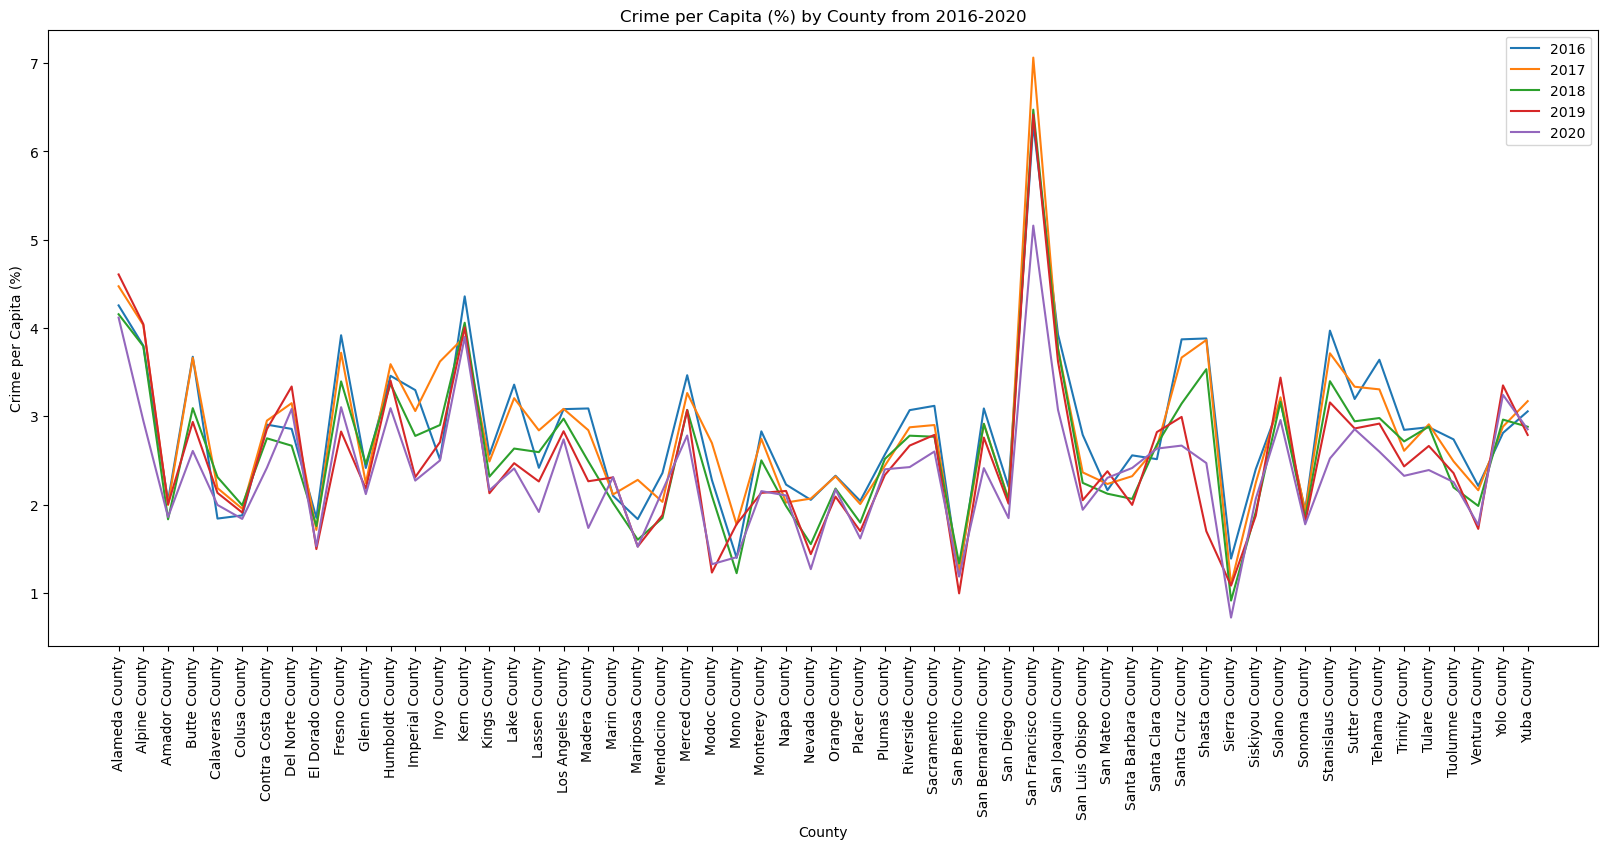

In [70]:
#create line graph based on crime per capita by county
crime_df.plot(kind="line",x='County',
              y=['2016 Crime per Capita (%)','2017 Crime per Capita (%)','2018 Crime per Capita (%)','2019 Crime per Capita (%)','2020 Crime per Capita (%)'], 
              label=["2016","2017","2018","2019","2020"],
              figsize=(20,8))
plt.title("Crime per Capita (%) by County from 2016-2020")
plt.ylabel("Crime per Capita (%)")
plt.xticks(crime_df.index,crime_df['County'],rotation=90)
plt.savefig("Crime per Capita (%) by County from 2016-2020")

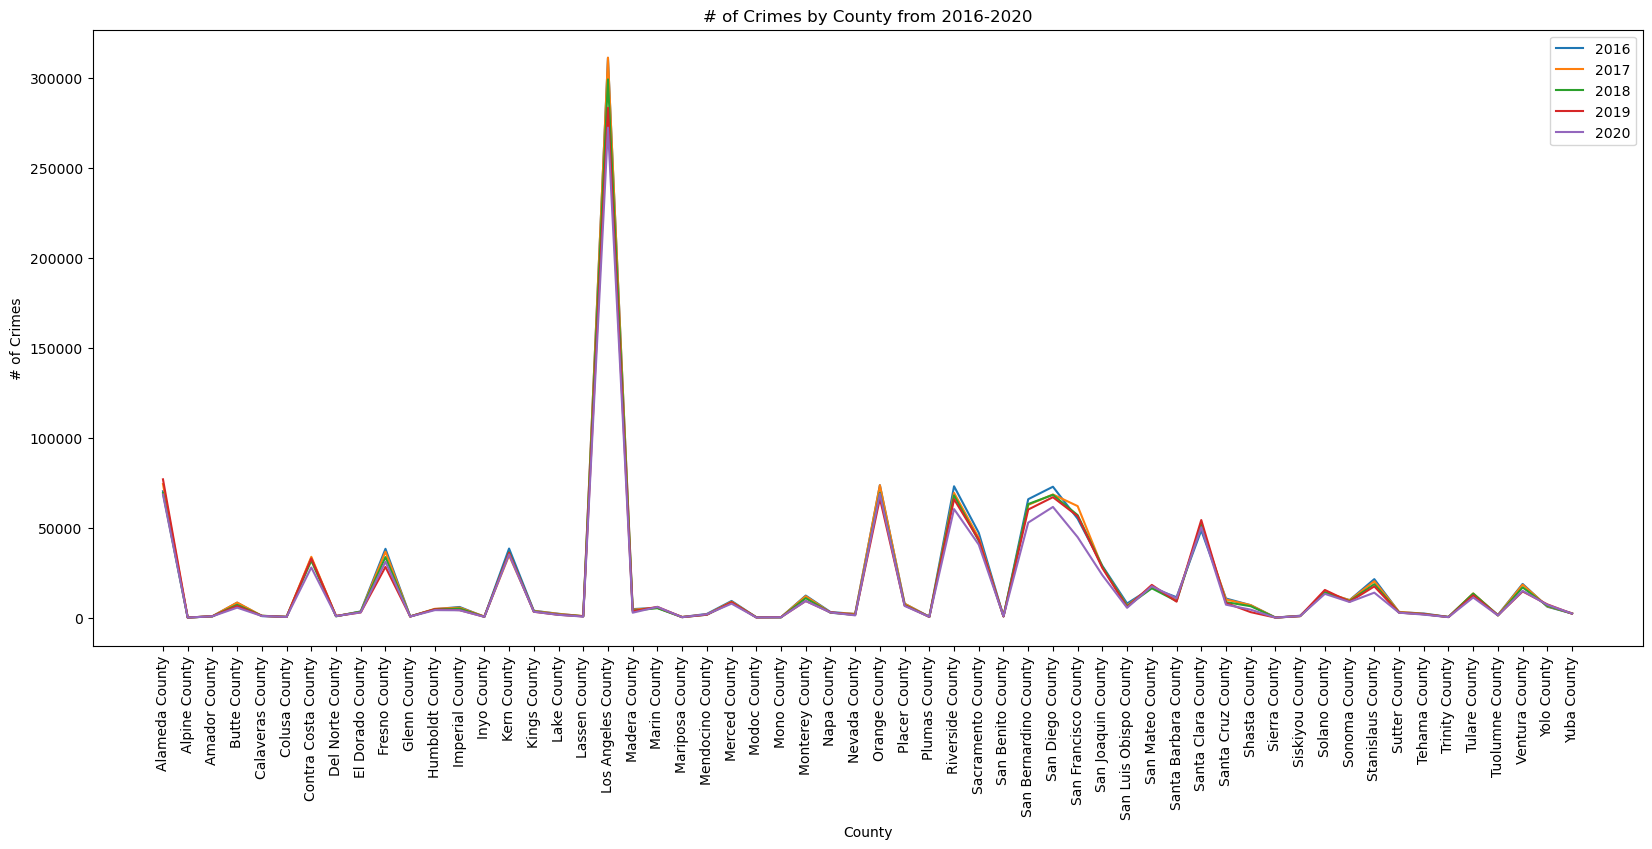

In [71]:
#create line graph based on # of crime by county
crime_df.plot(kind="line",x='County',
              y=['2016','2017','2018','2019','2020'], 
              label=["2016","2017","2018","2019","2020"],
              figsize=(20,8))
plt.title("# of Crimes by County from 2016-2020")
plt.ylabel("# of Crimes")
plt.xticks(crime_df.index,crime_df['County'],rotation=90)
plt.savefig("# of Crimes by County from 2016-2020.png")

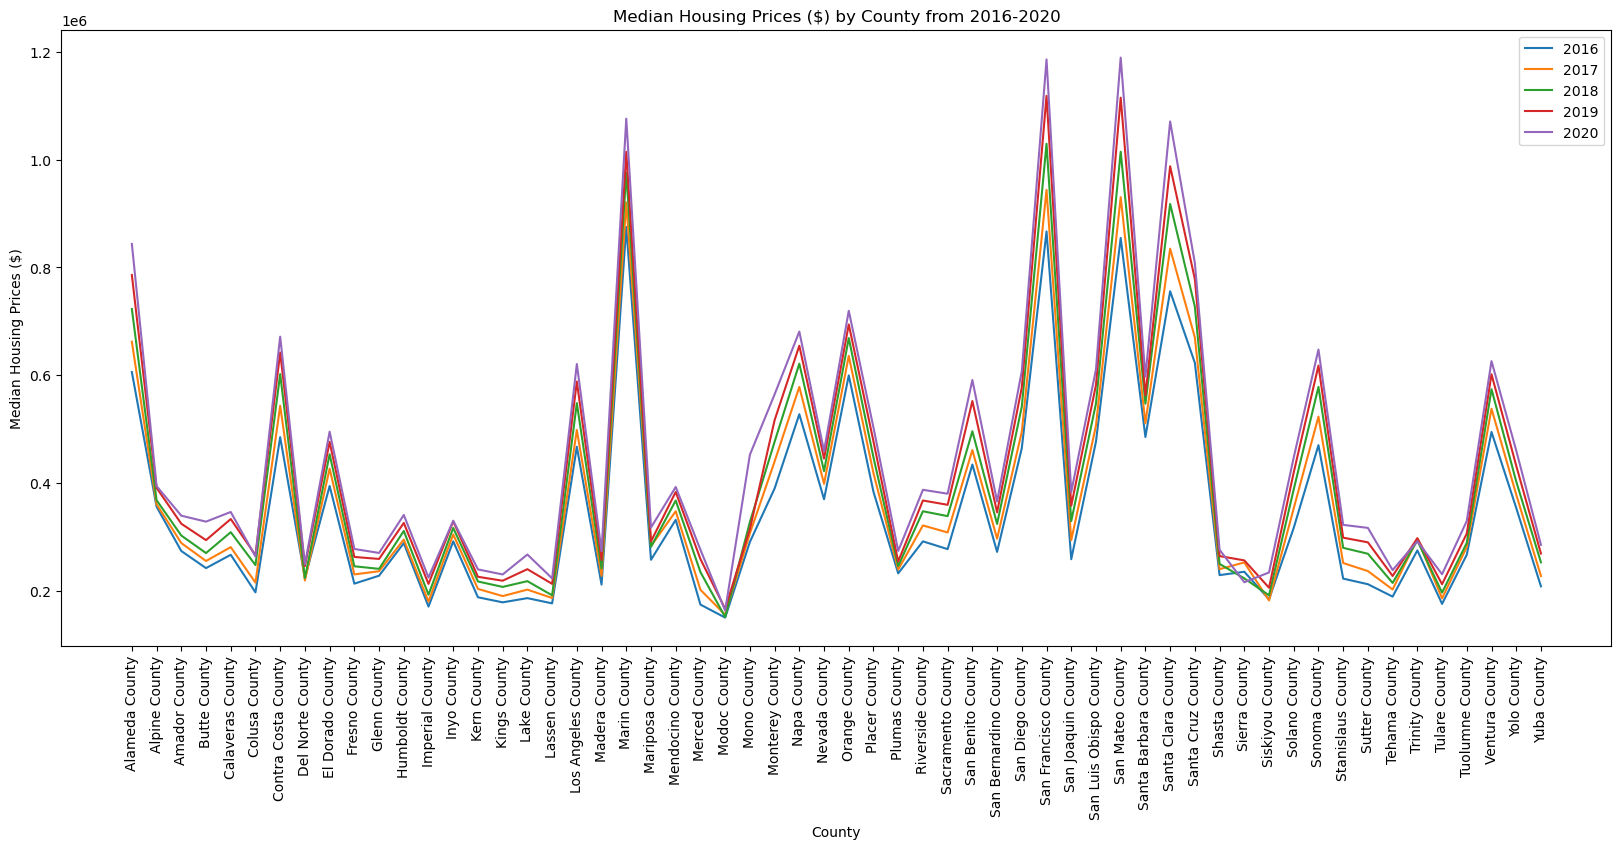

In [72]:
#create line graph based on median housing price by county
crime_df.plot(kind="line",x='County',
              y=['2016 Median Housing','2017 Median Housing','2018 Median Housing','2019 Median Housing','2020 Median Housing'], 
              label=["2016","2017","2018","2019","2020"],
              figsize=(20,8))
plt.title("Median Housing Prices ($) by County from 2016-2020")
plt.ylabel("Median Housing Prices ($)")
plt.xticks(crime_df.index,crime_df['County'],rotation=90)
plt.savefig("Median Housing Prices by County from 2016-2020.png")